# Tutorial 3

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
path = "../../src/"

## Task 1 Student Dataset

In [64]:
data = pd.read_csv(path + "data/student/student-por.csv", sep=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Task 1.1

In [59]:
corr = data[['G1', 'G2', 'G3']].corr()
corr.style.background_gradient(cmap='coolwarm_r')

,G1,G2,G3
G1,1.000000,0.864982,0.826387
G2,0.864982,1.000000,0.918548
G3,0.826387,0.918548,1.000000


array([[<Axes: xlabel='G1', ylabel='G1'>,
        <Axes: xlabel='G2', ylabel='G1'>,
        <Axes: xlabel='G3', ylabel='G1'>],
       [<Axes: xlabel='G1', ylabel='G2'>,
        <Axes: xlabel='G2', ylabel='G2'>,
        <Axes: xlabel='G3', ylabel='G2'>],
       [<Axes: xlabel='G1', ylabel='G3'>,
        <Axes: xlabel='G2', ylabel='G3'>,
        <Axes: xlabel='G3', ylabel='G3'>]], dtype=object)

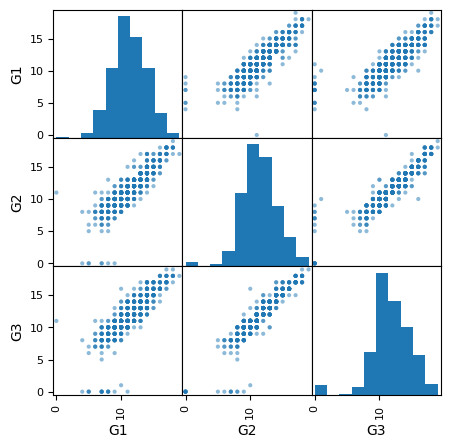

In [60]:
pd.plotting.scatter_matrix(data[['G1', 'G2', 'G3']], figsize=(5, 5))

### Task 1.2

In [61]:
first = pd.DataFrame({'grade_type': "first", 'grade_score': data.G1})
second = pd.DataFrame({'grade_type': "second", 'grade_score': data.G2})
final = pd.DataFrame({'grade_type': "final", 'grade_score': data.G3})
data = pd.concat([first, second, final], axis=0, ignore_index=True, sort=False)
data

,grade_type,grade_score
0,first,0
1,first,9
2,first,12
3,first,14
4,first,11
...,...,...
1942,final,10
1943,final,16
1944,final,9
1945,final,10


### Task 1.3

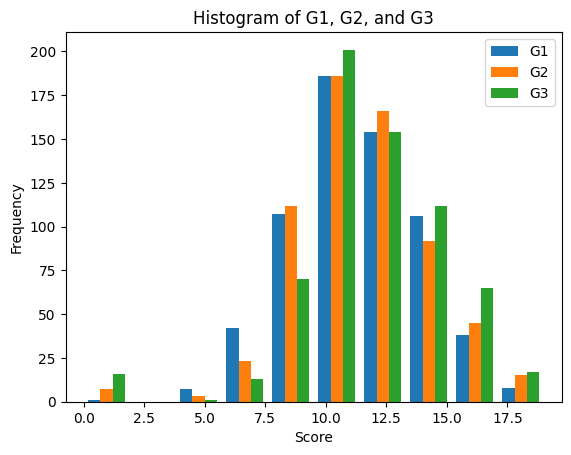

In [128]:
plt.hist([data.G1, data.G2, data.G3], label=['G1', 'G2', 'G3'])

plt.legend()

plt.title('Histogram of G1, G2, and G3')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.show()

### Task 1.4

<Axes: >

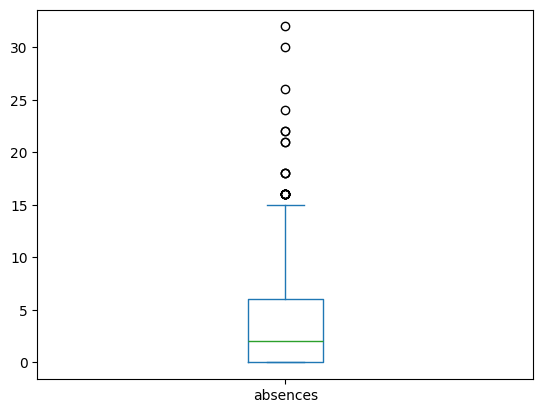

In [65]:
data.absences.plot.box()

In [66]:
summary = data['absences'].describe(percentiles=[0.25, 0.5, 0.75])

Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['absences'] < lower_bound) | (data['absences'] > upper_bound)]
outliers['absences']

40     16
103    16
150    24
155    22
161    16
197    32
206    16
211    16
212    30
217    21
230    16
253    18
254    16
256    26
263    16
311    16
325    22
326    18
397    18
405    16
413    21
Name: absences, dtype: int64

## Task 2 "Poisson-ness"

### Task 2.1

In [67]:
arrival = pd.read_csv(path + "data/er_arrivals.csv")
arrival

,date,num_arrivals
0,1963-02-04,2
1,1963-02-08,1
2,1963-02-11,1
3,1963-02-16,1
4,1963-02-18,2
...,...,...
420,1964-03-27,0
421,1964-03-28,0
422,1964-03-29,0
423,1964-03-30,0


### Task 2.2

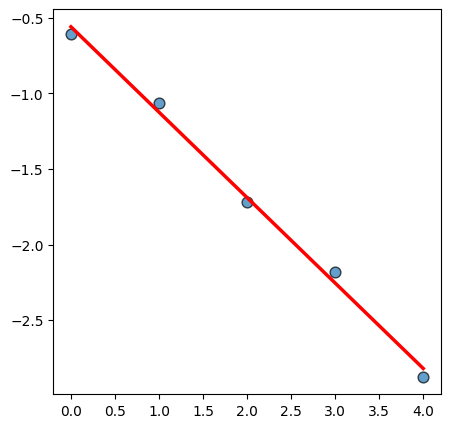

In [118]:
num = np.array(arrival.num_arrivals)
idx = np.argmax(num)
max = np.array(arrival.num_arrivals)[137]
N = num.size
X = []
k = range(max+1)
phi = []
for i in range(max+1):
    X.append(len(np.where(num == i)[0]))
    phi.append(np.log(math.factorial(i) * X[i] / N))


fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(k, phi, s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(k, phi, deg=1)
xseq = np.linspace(0, 4, num=1000)

ax.plot(xseq, a + b * xseq, color="red", lw=2.5)

### Task 2.3.1

In [122]:
sample_mean = np.mean(num)
sample_mean

np.float64(0.5905882352941176)

### Task 2.3.2

In [120]:
slope = b
lambda_estimate = np.exp(slope)
lambda_estimate

np.float64(0.5684761417891122)